# Sorting Algorithms
This notebook aims to be a reference manual to different kinds of sorting algorithms. This notebook should be used for academic purposes only. 
We shall start with the simplest of the algorthims and slowly make our way to the more involved ones. 

## Useful Resources

#### 📺 Videos

- [Why is Radix Sort so fast? Miniseries by Creel](https://youtube.com/playlist?list=PLP-tTFRnLIX_3Y8lugE7nfMZq1y17UhLX)

#### 📚Books

- [Introduction to Algorithms by CLRS](https://mitpress.mit.edu/9780262046305/introduction-to-algorithms/)

In [23]:
# Common imports
import random

## Bogosort
As the name suggests, it is a "bogous" sort that is more of a running joke than an algorithm. It has a complexity of $O(n!)$. It simply checks all permutations of the array until it's sorted.

In [24]:
arr = [random.randint(0, 100) for _ in range(10)]
print("Sample array = ", arr)
def bogosort(arr):
    sorted = False
    while not sorted:
        random.shuffle(arr)
        sorted = True
        for i in range(1, len(arr)):
            if arr[i-1] > arr[i]:
                sorted = False
                break
    return arr
bogosort(arr)

Sample array =  [27, 31, 62, 51, 13, 7, 66, 82, 76, 78]


[7, 13, 27, 31, 51, 62, 66, 76, 78, 82]

## Bubble Sort
Bubble sort is the simplest of the sorting algorithms. It is also very inefficient, at least for noiseless sorting applications. 
This algorithm simply goes over the array $n$ times as the smallest values 'bubble up' from the rest of the array elements. It stops when all the items are sorted.

In [25]:
arr = [random.randint(0, 100) for _ in range(10)]
print("Sample array = ", arr)
def bubblesort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr
                
bubblesort(arr)

Sample array =  [14, 64, 90, 36, 98, 43, 91, 2, 44, 24]


[2, 14, 24, 36, 43, 44, 64, 90, 91, 98]

Bubble sort is a $O(n^2)$ in-place sorting algorithm. 

## Selection Sort
Selection sort "selects" the  minimum/maximum element from the array and places them in the sorted array. 

In [26]:
arr = [random.randint(0, 100) for _ in range(10)]
print("Sample array = ", arr)
def selectionsort(arr):
    n = len(arr)
    for i in range(n):
        max = -float('inf')
        for j in range(n - i):
            if arr[j] > max:
                max = arr[j]
                max_index = j
        arr[max_index], arr[n - i - 1] = arr[n - i - 1], arr[max_index]
    return arr

selectionsort(arr)

Sample array =  [76, 19, 17, 32, 10, 76, 11, 42, 24, 35]


[10, 11, 17, 19, 24, 32, 35, 42, 76, 76]

Selection sort is also an $O(n^2)$ in-place sort.

## Insertion sort
Insertion sort "inserts" appropriate values to an already sorted array. As an inital case, it assumes that the first element is already sorted.

In [27]:
arr = [random.randint(0, 100) for _ in range(10)]
print("Sample array = ", arr)
def insertionsort(arr):
    n = len(arr)
    for i in range(n):
        min = float('inf')
        for j in range(i, n):
            if arr[j] < min:
                min = arr[j]
                arr[j], arr[i] = arr[i], arr[j]
    return arr

insertionsort(arr)

Sample array =  [82, 100, 20, 83, 54, 49, 6, 25, 49, 2]


[2, 6, 20, 25, 49, 49, 54, 82, 83, 100]

This is also an $O(n^2)$ algorithm.

## Merge Sort
This is a classic divide-and-conquer algorithm that divides the array into two subarrays at each stage. 
This algorithm has the following recurrence relation: $$T(n) = 2T(n/2) + O(n)$$

Using master's theorem, we can solve this recurrence to be $O(n \log n)$, thus making this our first logartithmic time algorithm here. In fact, this is the lower bound for sorting algorithms.

In [28]:
arr = [random.randint(0, 100) for _ in range(10)]
print("Sample array = ", arr)
def merge(left, right):
    merged = []
    i = 0
    j = 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1
            
    while i < len(left):
        merged.append(left[i])
        i += 1
    while j < len(right):
        merged.append(right[j])
        j += 1
        
    return merged
    
def mergesort(arr):
    if len(arr) == 1:
        return arr
    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]

    left_half = mergesort(left_half)
    right_half = mergesort(right_half)
    return merge(left_half, right_half)

mergesort(arr)

Sample array =  [60, 13, 41, 77, 86, 9, 45, 21, 69, 43]


[9, 13, 21, 41, 43, 45, 60, 69, 77, 86]

## Heapsort
Heap sort is basically selection sort using a min/max heap as the data structure instead of a plain array.
Python has an inbuilt library for heap, therfore, we will show this algorithm with that. Building the heap takes $O(n \log n)$ time, and each pop operation takes $O(\log n)$ time, thus making this algorithm an $O(n \log n)$.

### Using `heapq`

In [29]:
arr = [random.randint(0, 100) for _ in range(10)]
print("Sample array = ", arr)

def heapsort(arr):
    import heapq
    heapq.heapify(arr)
    sorted_arr = []
    while len(arr):
        sorted_arr.append(heapq.heappop(arr))
    return sorted_arr

heapsort(arr)

Sample array =  [69, 37, 91, 61, 46, 18, 66, 97, 70, 27]


[18, 27, 37, 46, 61, 66, 69, 70, 91, 97]

## Quick sort
Quick sort is a randomized algorithm with an average time complexity of $O(n \log n)$. However, in worst case, which is rare, it has a time complexity of $O(n^2)$. The heart of an efficient quicksorrrt implentation lies in the partitioning technique employed. There are two partitioning techniques mentioned in CLRS - Lomuto and Hoare. Other than pedagogical values, the [Lomuto partitioning scheme has little advantage over Hoare](https://cs.stackexchange.com/questions/11458/quicksort-partitioning-hoare-vs-lomuto). 

In [30]:
arr = [random.randint(0, 100) for _ in range(10)]
print("Sample array = ", arr)

def random_partition(arr, start_index, end_index):
    i = random.randint(start_index, end_index)
    arr[i], arr[end_index] = arr[end_index], arr[i]
    return partition(arr, start_index, end_index)

def partition(arr, start_index, end_index):
    x = arr[end_index]
    i = start_index - 1
    for j in range(start_index, end_index):
        if arr[j] <= x:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i+1], arr[end_index] = arr[end_index], arr[i + 1]
    return i + 1

def quicksort(arr, start_index, end_index):
    if start_index < end_index:
        pivot_index = random_partition(arr, start_index, end_index)
        quicksort(arr, start_index, pivot_index - 1)
        quicksort(arr, pivot_index + 1, end_index)

quicksort(arr, 0, len(arr) - 1)
print(arr)

Sample array =  [29, 67, 50, 100, 76, 20, 25, 78, 27, 60]
[20, 25, 27, 29, 50, 60, 67, 76, 78, 100]


## Counting Sort
Till now, we have only seen comparison bases sorts. Now let's dive into a non-comparison bases sorting technique. Counting sort works best for arrays with a small range of values. It has a time complexity of $O(n)$. It's only drawback is the auxilary space required sort arrays with a wide range of values.

In [31]:
arr = [random.randint(0, 100) for _ in range(10)]
print("Sample array =", arr)

def countingsort(arr):
    num_bucket = [0 for _ in range(max(arr) + 1)]
    for each_num in arr:
        num_bucket[each_num] += 1
    
    sorted_arr = []
    for i in range(len(num_bucket)):
        if num_bucket[i] > 0:
            sorted_arr.extend([i for _ in range(num_bucket[i])])
    
    return sorted_arr

countingsort(arr)

Sample array = [84, 64, 77, 32, 36, 18, 5, 16, 73, 97]


[5, 16, 18, 32, 36, 64, 73, 77, 84, 97]

## Radix Sort
Radix sort is a non-comparison based sort that relies on digits or radix. It has a time-complxity of $O(k \cdot n)$ where $k$ is the number of digits in the elements and $n$ is the number of elements.

In [32]:
arr = [random.randint(0, 100) for _ in range(10)]
print("Sample array =", arr)

def radixsort(arr):
    for digit_index in range(len(str(max(arr)))):
        output = [0 for _ in range(len(arr))]
        digit_bucket = [0 for _ in range(10)]
        for each_item in arr:
            digit = (each_item // 10 ** digit_index) % 10
            digit_bucket[digit] += 1

        # prefix sum
        for i in range(1, 10):
            digit_bucket[i] += digit_bucket[i - 1]

        for each_num in reversed(arr):
            digit = (each_num // 10 ** digit_index) % 10
            output[digit_bucket[digit] - 1] = each_num
            digit_bucket[digit] -= 1
        arr = output
    return arr

radixsort(arr)

Sample array = [37, 88, 45, 39, 7, 30, 61, 44, 95, 27]


[7, 27, 30, 37, 39, 44, 45, 61, 88, 95]

## Topological Sort
We do topolgical sort or topsort for short on Directed Acyclic Graphs (DAGs). It is the topological ordering of nodes with respect to their dependence on each other. Topological sort has many important practical applications including scheduling and dependency management. Topsort of a given DAG is not uniqie however. Any DAG has at least one topological ordering. The usual running time for topsort algorithms is $O(|V| + |E|)$. We will be looking into [Kahn's algorithm](https://en.wikipedia.org/wiki/Topological_sorting#Kahn's_algorithm) here.

We perform topsort on the following DAG (courtesy: [William Fiset](https://youtu.be/cIBFEhD77b4))

<!-- <img src="res/dag.png" alt="DAG" width=500> -->
<!-- ![DAG](res/dag.png) -->

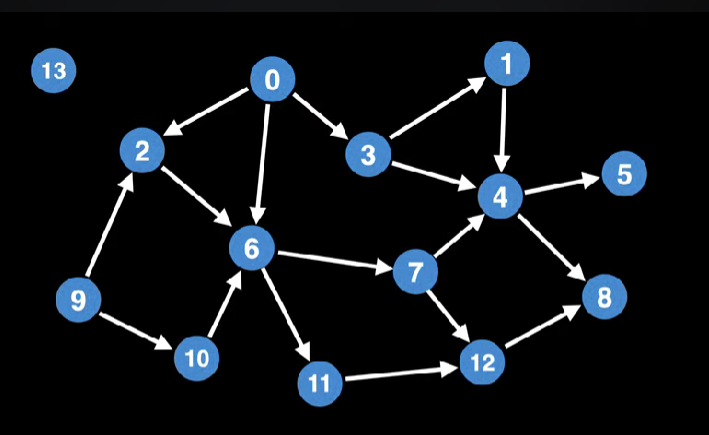

In [33]:
from IPython.display import Image
Image("res/dag.png")

In [34]:
# We define a DAG as an adjacency list with each vertex containing list of vertices an edge is incoming from
dag = {
    0  : [],
    1  : [3],
    2  : [0, 9],
    3  : [0],
    4  : [1, 3],
    5  : [4],
    6  : [0, 2, 10],
    7  : [6],
    8  : [4, 12],
    9  : [],
    10 : [9],
    11 : [6],
    12 : [7, 11],
    13 : []
}

def topsort(dag):
    from collections import deque
    sorted_list = []
    vert_with_no_incoming_edges = deque([])

    for each_vertex in dag:
        if len(dag[each_vertex]) == 0:
            vert_with_no_incoming_edges.append(each_vertex)
    while len(vert_with_no_incoming_edges) > 0: 
        vertex = vert_with_no_incoming_edges.popleft()
        sorted_list.append(vertex)
        for each_vertex in dag:
            if dag[each_vertex] is not None:
                if vertex in dag[each_vertex]:
                    dag[each_vertex].remove(vertex)
                if len(dag[each_vertex]) == 0:
                    dag[each_vertex] = None
                    vert_with_no_incoming_edges.append(each_vertex)
    return sorted_list

print(topsort(dag))


[0, 9, 13, 0, 3, 9, 13, 2, 10, 1, 6, 4, 7, 11, 5, 12, 8]


## Performance Comparison

On running the algorithms on a set of 1000 inputs of integer arrays, we observe that heapsort and counting sort  outperform all other algorithms.

### Running the algorithms serially on a single core
Peak processor speed during execution = 3.54 GHz

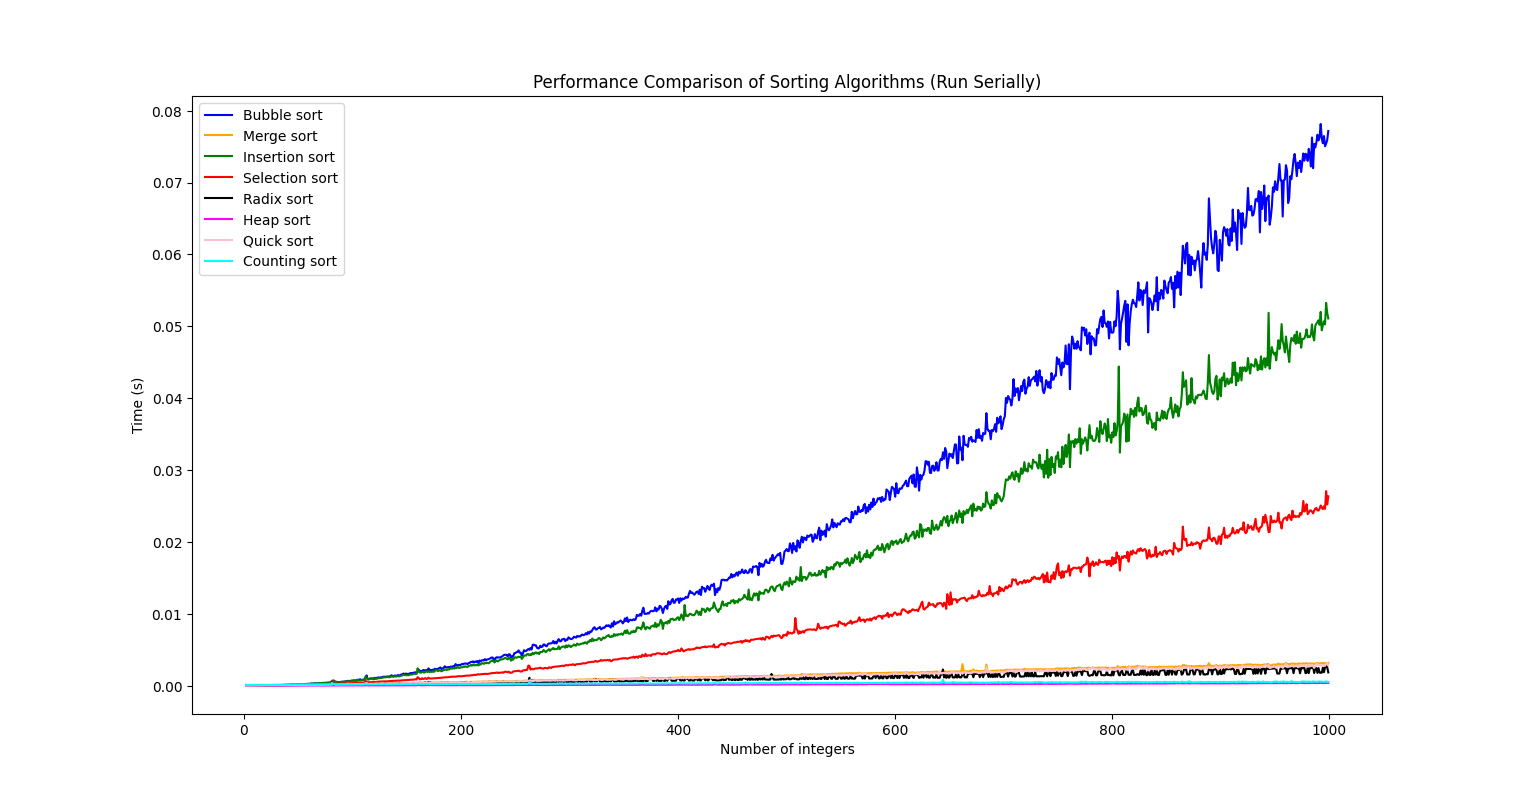

In [35]:
from IPython.display import Image
Image("res/1000_serially_sorting.png")

We zoom into the plot for last few inputs to see the performance difference more clearly.

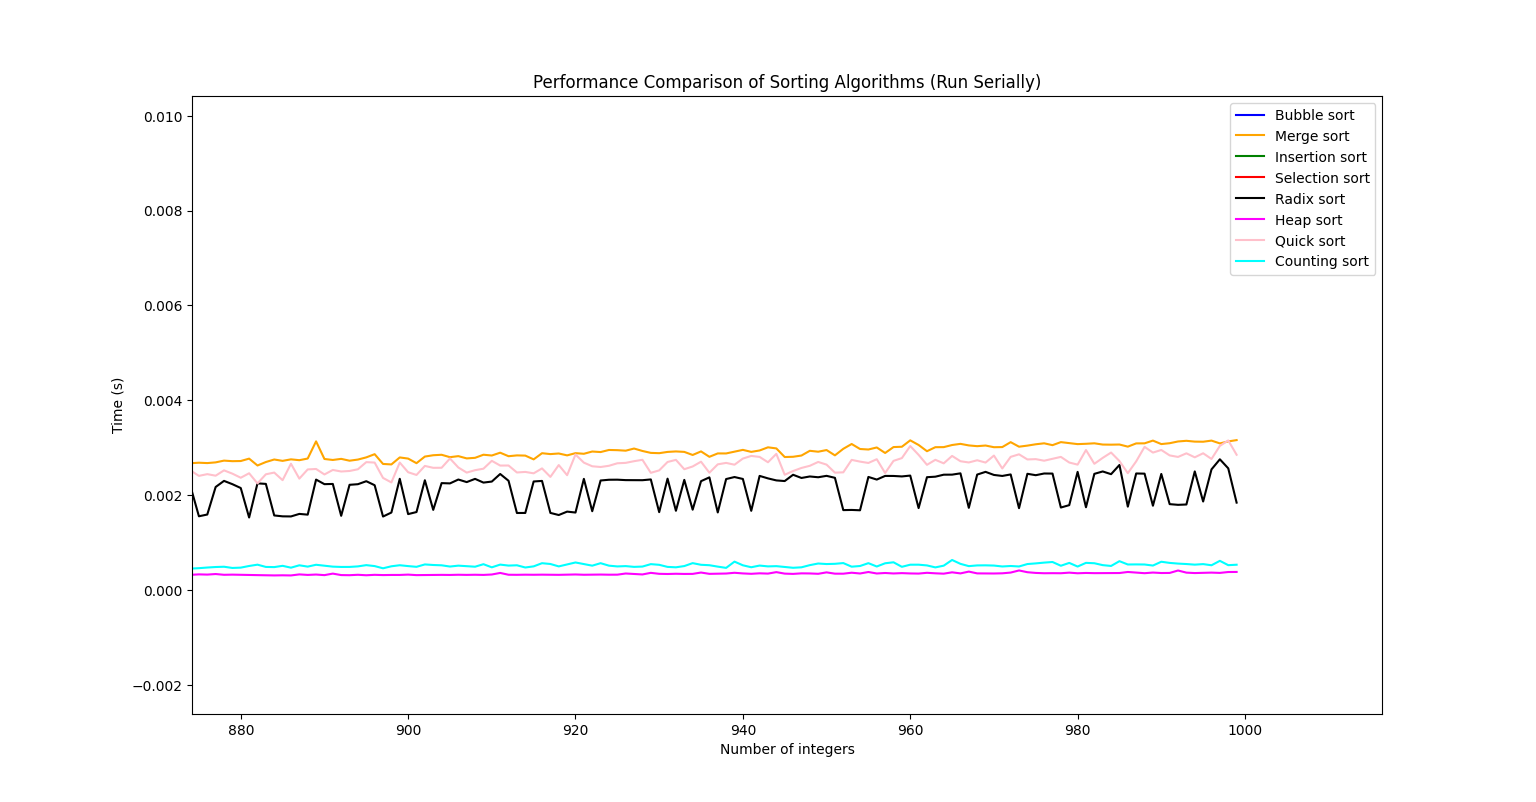

In [36]:
Image("res/1000_serially_zoomed_sort.png")

### Running parallely on multiple cores
The following plot was obtained by running the algorithms parallely on 8 logical cores.

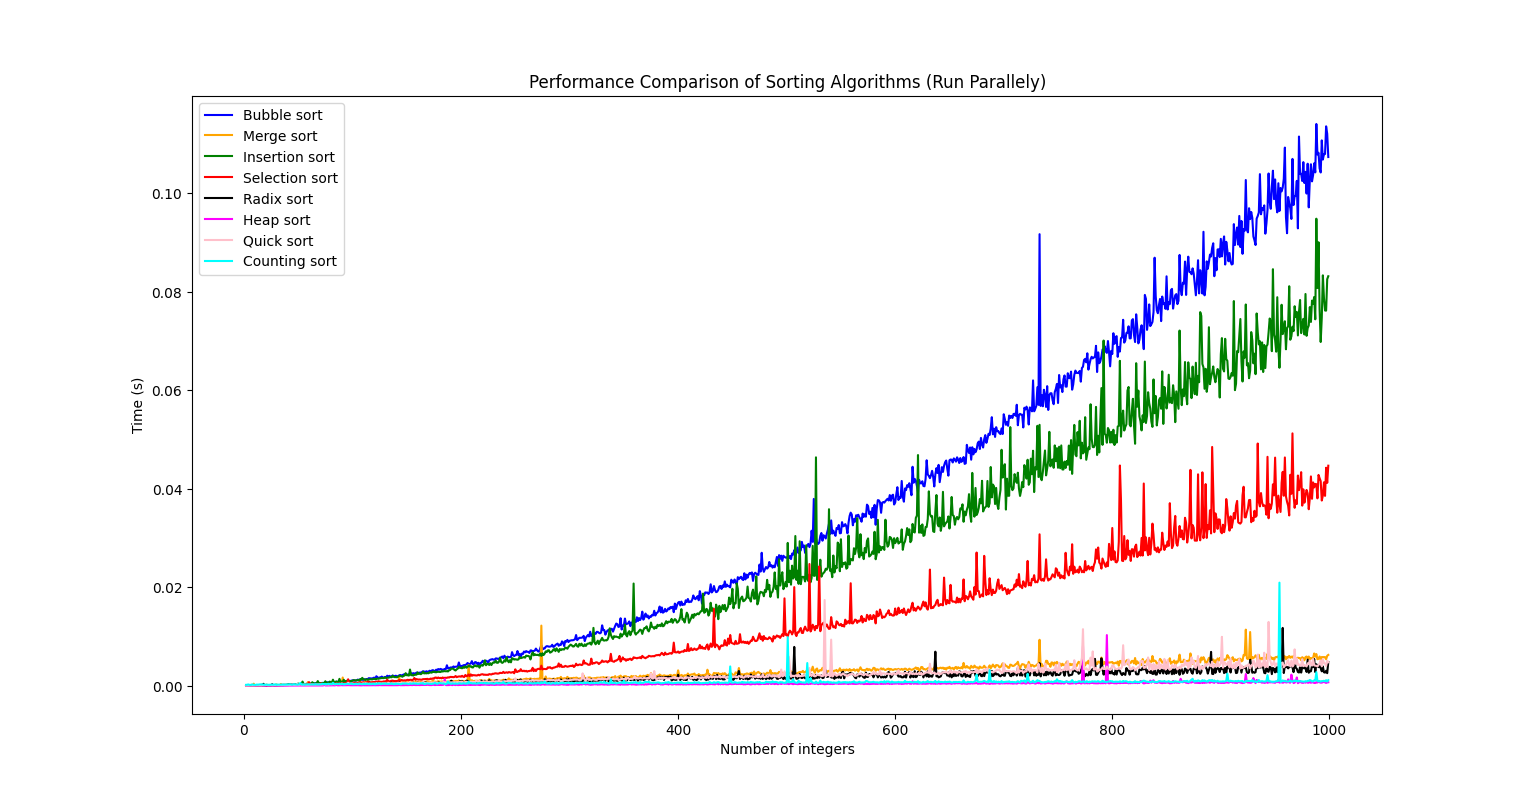

In [37]:
Image("res/1000_parallel_sorting.png")


We zoom in further to see the difference more clearly.

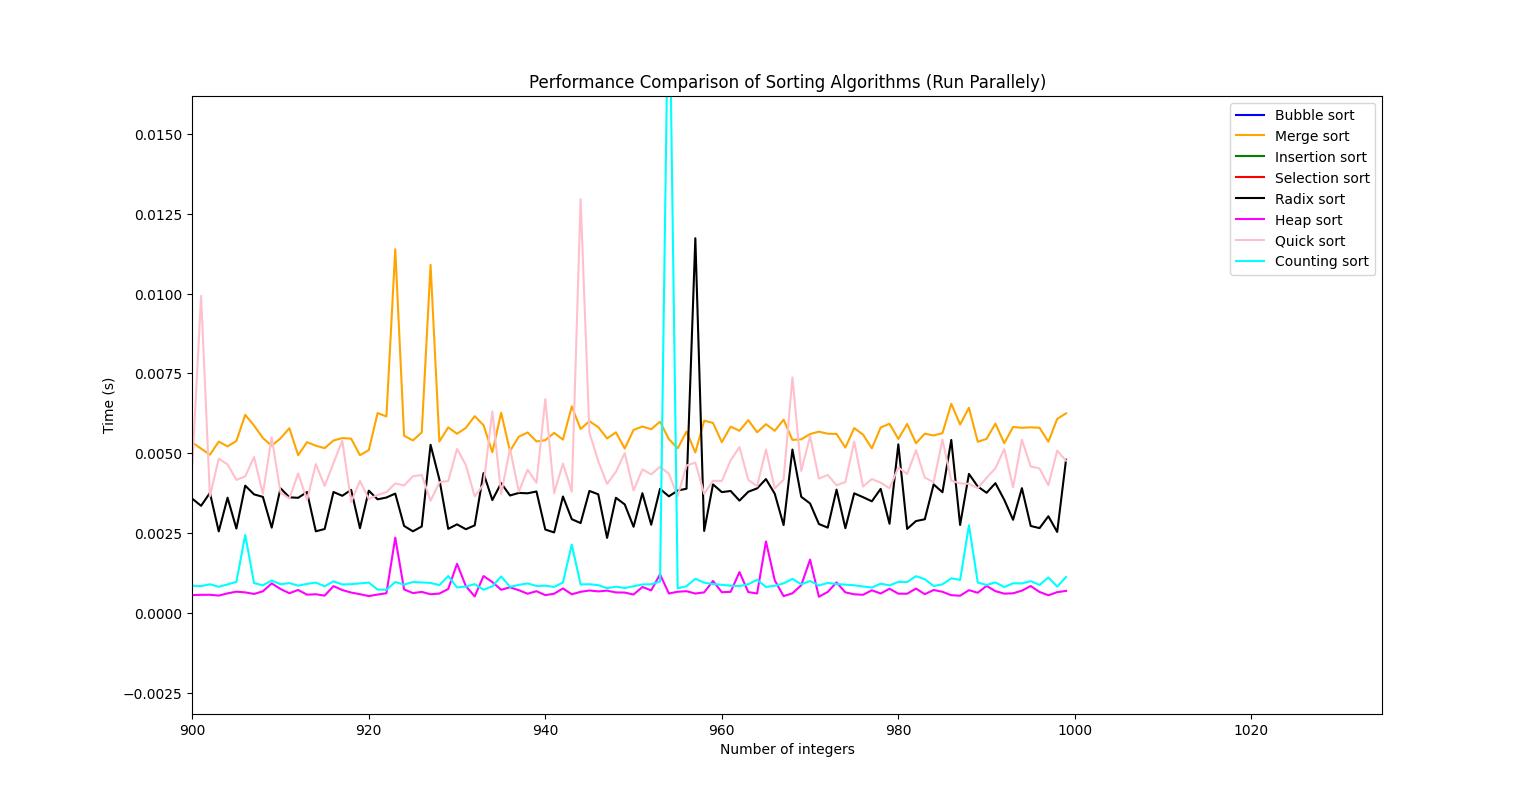

In [38]:
Image("res/zoomed_in_1000_parallel_sort.png")

Thus, we can conclude that Heap sort and Counting sort are the best perfoming sorting algorithms for medium-sized array of integers. However, counting sort is not feasible for very large arrays due to its large auxiliary space footprint.